In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import PIL
import cv2
import numpy as np
from PIL import ImageStat
# plt.rcParams['font.sans-serif'] = ['SimSun']  # 或 ['Microsoft YaHei']

In [3]:
#pic
img1 = Image.open("origin_images/222.png").convert('L')
array = np.load('anti.npy')
image1 = img1/array
image1 = np.clip(image1*255,0,255).astype(np.uint8)
#back
img2 = Image.open("back_images/without2to222.png").convert('L')

In [4]:
print(img2.size)
# 将图像转换为NumPy数组（浮点数类型）
image1 = np.array(img1, dtype=np.float64)
image2 = np.array(img2, dtype=np.float64)
result_image = image1 - image2
print(result_image.shape)
print(image2.shape)

(4024, 3036)
(3036, 4024)
(3036, 4024)


In [5]:
# img = Image.fromarray(result_image)
# plt.imshow(result_image, cmap="gray")

In [6]:
# # 打开图像文件
# image = image1
# # 获取图像的宽度和高度
# width, height = image.shape
# row_number = 1518
# row_data = image[row_number,:]
# # 创建柱状图
# plt.subplot(211)
# plt.bar(range(len(row_data)), row_data, width=1.0)

# plt.title(f'Row {row_number}')
# plt.xlabel('Column Index')
# plt.ylabel('Value')
# # 显示图形
# plt.show()
# plt.subplot(212)
# # 打开图像文件
# image = image2
# # 获取图像的宽度和高度
# width, height = image.shape
# row_number = 1518
# row_data = image[row_number,: ]
# plt.bar(range(len(row_data)), row_data, width=1.0)

# plt.title(f'Row {row_number}')
# plt.xlabel('Column Index')
# plt.ylabel('Value')
# # 显示图形
# plt.show()

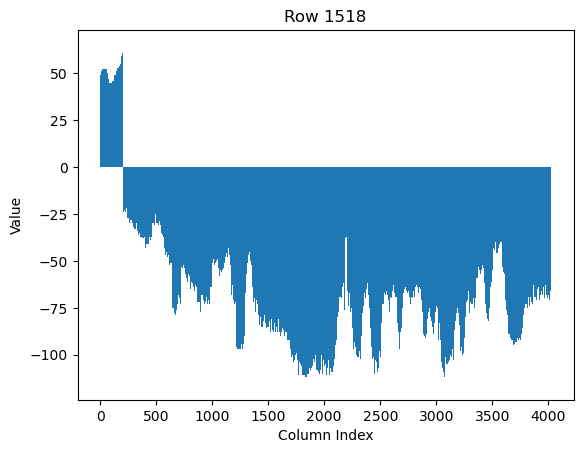

In [7]:
# 打开图像文件
image = result_image
# 获取图像的宽度和高度
width, height = image.shape
row_number = 1518
row_data = image[row_number, :]
plt.bar(range(len(row_data)), row_data, width=1.0)

plt.title(f'Row {row_number}')
plt.xlabel('Column Index')
plt.ylabel('Value')
# 显示图形
plt.show()

In [8]:
# np.save('1-2.npy', result_image)
# print(row_data.shape)
# for element in row_data:
#     print(element)

In [9]:
# 设置打印选项，使其打印所有元素
np.set_printoptions(threshold=np.inf)
# 打印数组
# print(row_data)

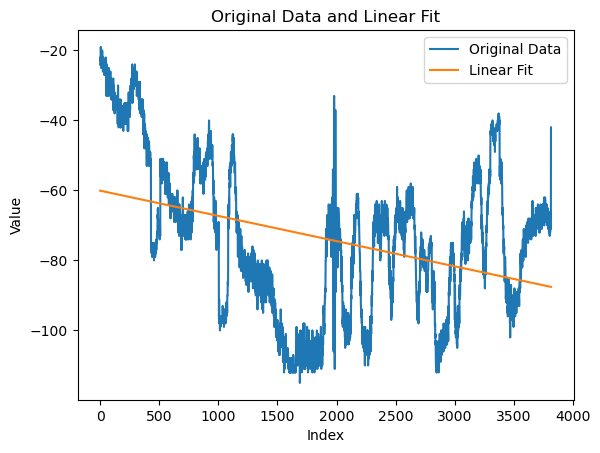

Difference between original data and linear fit:
[ 3.60659780e+01  3.60731872e+01  3.80803963e+01  3.70876055e+01
  3.80948147e+01  3.71020239e+01  4.11092331e+01  4.01164423e+01
  3.71236514e+01  3.51308606e+01  3.61380698e+01  3.61452790e+01
  3.61524882e+01  3.61596974e+01  3.61669066e+01  3.51741157e+01
  3.91813249e+01  3.61885341e+01  4.01957433e+01  3.82029525e+01
  3.52101617e+01  3.72173708e+01  3.82245800e+01  3.62317892e+01
  3.42389984e+01  3.52462076e+01  3.82534168e+01  3.72606260e+01
  3.42678351e+01  3.42750443e+01  3.62822535e+01  3.52894627e+01
  3.42966719e+01  3.43038811e+01  3.63110902e+01  3.33182994e+01
  3.43255086e+01  3.73327178e+01  3.73399270e+01  3.43471362e+01
  3.33543453e+01  3.43615545e+01  3.43687637e+01  3.33759729e+01
  3.33831821e+01  3.43903913e+01  3.33976005e+01  3.74048096e+01
  3.84120188e+01  3.64192280e+01  3.74264372e+01  3.64336464e+01
  3.24408556e+01  3.04480647e+01  2.74552739e+01  2.84624831e+01
  3.14696923e+01  3.64769015e+01  3.24841

In [10]:
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

# 创建示例数组
original_array = row_data

# 取数组的208位之后的元素，创建新数组
new_array = original_array[209:]

# 进行线性拟合
slope, intercept, _, _, _ = linregress(np.arange(len(new_array)), new_array)
linear_fit = slope * np.arange(len(new_array)) + intercept

# 计算每个位置的值与拟合线性函数的差异
difference = new_array - linear_fit

# 绘制原始数据和拟合线性函数
plt.plot(np.arange(len(new_array)), new_array, label='Original Data')
plt.plot(np.arange(len(new_array)), linear_fit, label='Linear Fit')
plt.legend()
plt.title('Original Data and Linear Fit')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

# 输出结果
print("Difference between original data and linear fit:")
print(difference)


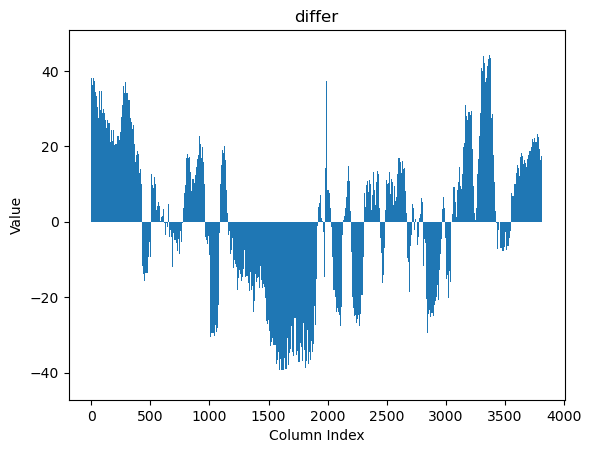

In [11]:
selected_difference = difference[:]
plt.bar(range(len(selected_difference)), selected_difference, width=1.0)

plt.title("differ")
plt.xlabel('Column Index')
plt.ylabel('Value')
# 显示图形
plt.show()

In [12]:
for element in difference:
    print(element)

36.06597797505707
36.07318715940654
38.08039634375601
37.08760552810547
38.09481471245494
37.102023896804404
41.10923308115387
40.11644226550334
37.1236514498528
35.13086063420227
36.138069818551735
36.1452790029012
36.15248818725067
36.15969737160013
36.166906555949595
35.174115740299065
39.18132492464853
36.188534108998
40.19574329334746
38.202952477696925
35.210161662046396
37.21737084639586
38.22458003074533
36.23178921509479
34.238998399444256
35.246207583793726
38.25341676814319
37.26062595249266
34.26783513684212
34.27504432119159
36.28225350554106
35.28946268989052
34.29667187423999
34.303881058589454
36.31109024293892
33.31829942728839
34.32550861163785
37.33271779598732
37.339926980336784
34.34713616468625
33.35434534903572
34.36155453338518
34.368763717734645
33.375972902084115
33.38318208643358
34.39039127078305
33.39760045513251
37.404809639481975
38.412018823831446
36.41922800818091
37.42643719253038
36.43364637687984
32.440855561229306
30.448064745578776
27.4552739299282